In [3]:
import numpy as np
import pandas as pd

constructors= pd.read_csv("Datasets/f1_2010-2021/constructor_standings_2010-2021.csv")
constructors.head(130)


,index,team,points,year
0,0,RBR Renault,498.0,2010
1,1,McLaren Mercedes,454.0,2010
2,2,Ferrari,396.0,2010
3,3,Mercedes,214.0,2010
4,4,Renault,163.0,2010
...,...,...,...,...
125,5,AlphaTauri Honda,142.0,2021
126,6,Aston Martin Mercedes,77.0,2021
127,7,Williams Mercedes,23.0,2021
128,8,Alfa Romeo Racing Ferrari,13.0,2021


In [29]:
#replacing index with position
constructors.rename(columns={'index':'position'},inplace= True)




for i in range (len(constructors)):
        constructors ["position"][i] = constructors["position"][i] +1
constructors


C:\Users\tanma\AppData\Local\Temp/ipykernel_8864/702501440.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  constructors ["position"][i] = constructors["position"][i] +1


,position,team,points,year
0,2,RBR Renault,498.0,2010
1,3,McLaren Mercedes,454.0,2010
2,4,Ferrari,396.0,2010
3,5,Mercedes,214.0,2010
4,6,Renault,163.0,2010
...,...,...,...,...
125,7,AlphaTauri Honda,142.0,2021
126,8,Aston Martin Mercedes,77.0,2021
127,9,Williams Mercedes,23.0,2021
128,10,Alfa Romeo Racing Ferrari,13.0,2021


In [7]:
#total seasons
seasons = constructors ["year"].nunique()
seasons

12

In [12]:
#average points per season
sum_of_all_points_per_constructor = constructors.groupby(["team"])["points"].sum()
average_points_per_season =  sum_of_all_points_per_constructor/seasons
average_points_per_season = pd.DataFrame(average_points_per_season)
average_points_per_season

,points
team,
Alfa Romeo Racing Ferrari,6.500000
AlphaTauri Honda,20.750000
Alpine Renault,12.916667
Aston Martin Mercedes,6.416667
Caterham Renault,0.000000
Ferrari,384.875000
Force India Mercedes,85.500000
Force India Sahara,0.000000
HRT Cosworth,0.000000


<AxesSubplot:title={'center':'Average Points per season'}, xlabel='team', ylabel='points'>

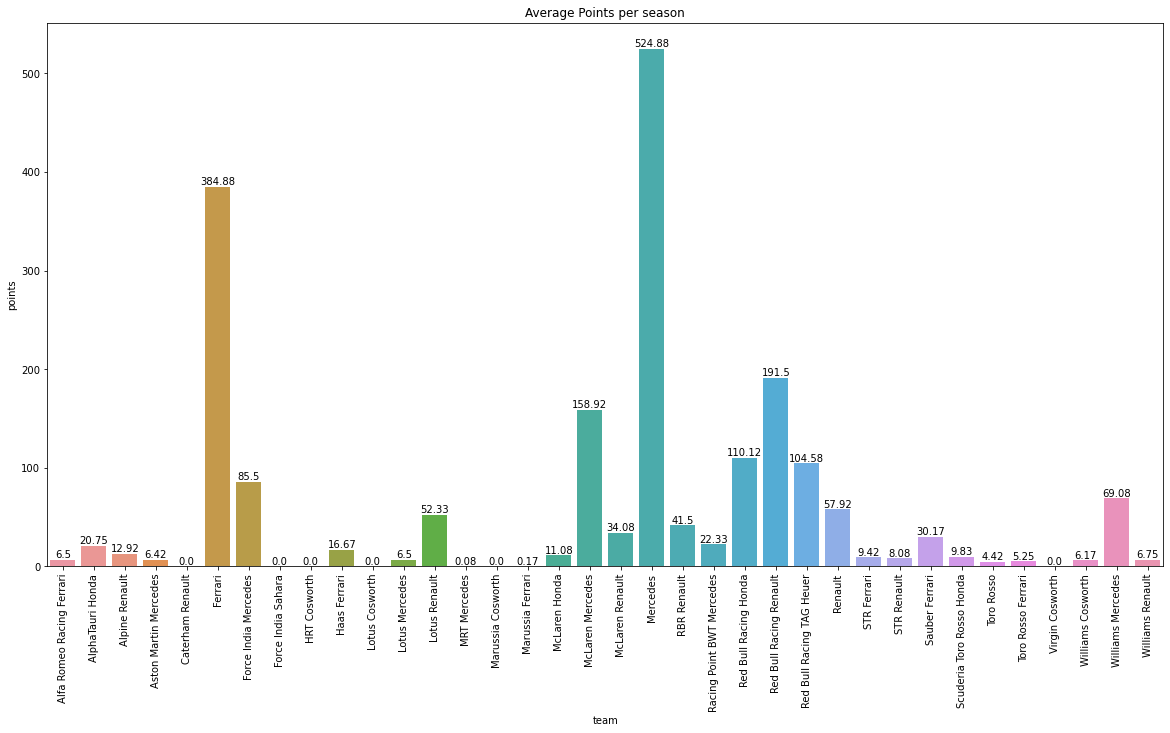

In [19]:

average_points_per_season.reset_index(level=0, inplace=True)
average_points_per_season


import matplotlib.pyplot as plt 
import seaborn as sns

plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.title("Average Points per season")
for i in range(len(average_points_per_season)):
    plt.annotate(str(round(average_points_per_season["points"][i],2)), xy=(average_points_per_season.index[i],average_points_per_season["points"][i]), ha="center", va="bottom")

sns.barplot(x="team",y="points",data=average_points_per_season)

In [26]:
constructors_world_champion = pd.DataFrame(constructors[constructors.groupby(["year"])["points"].transform("max")==constructors["points"]])
constructors_world_champion


#indexfixing
constructors_world_champion.reset_index(level = 0, inplace=True)
constructors_world_champion.drop("index", axis=1, inplace=True)
constructors_world_champion

,position,team,points,year
0,1,RBR Renault,498.0,2010
1,1,Red Bull Racing Renault,650.0,2011
2,1,Red Bull Racing Renault,460.0,2012
3,1,Red Bull Racing Renault,596.0,2013
4,1,Mercedes,701.0,2014
5,1,Mercedes,703.0,2015
6,1,Mercedes,765.0,2016
7,1,Mercedes,668.0,2017
8,1,Mercedes,655.0,2018
9,1,Mercedes,739.0,2019


<AxesSubplot:title={'center':'Which team won the Constructors World Championship every year'}, xlabel='year', ylabel='points'>

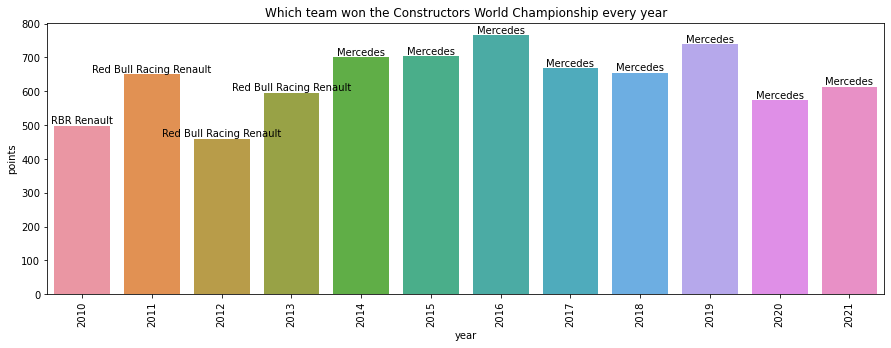

In [28]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
plt.title("Which team won the Constructors World Championship every year")
for i in range (len(constructors_world_champion)):
    plt.annotate(str(constructors_world_champion["team"][i]), xy=(constructors_world_champion.index[i], constructors_world_champion["points"][i]), ha="center", va="bottom")
    
sns.barplot(x="year",y="points", data=constructors_world_champion)

In [142]:
drivers = pd.read_csv("Datasets/f1_2010-2021/driver_standings_2010-2021.csv")


#changing index to columns
drivers.rename(columns={'index':'position'},inplace=True)
drivers
for i in range(len(drivers)):
    drivers['position'][i] = drivers['position'][i] + 1 
    
    
#combining name and surname
drivers["name"] = drivers[["name", "surname"]].agg(" ".join, axis=1)
drivers.drop("surname", axis=1, inplace= True)
drivers


C:\Users\tanma\AppData\Local\Temp/ipykernel_3196/1234676031.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drivers['position'][i] = drivers['position'][i] + 1


,position,name,nationality,points,year
0,1,Sebastian Vettel,GER,256.0,2010
1,2,Fernando Alonso,ESP,252.0,2010
2,3,Mark Webber,AUS,242.0,2010
3,4,Lewis Hamilton,GBR,240.0,2010
4,5,Jenson Button,GBR,214.0,2010
...,...,...,...,...,...
250,17,Nicholas Latifi,CAN,7.0,2020
251,18,Antonio Giovinazzi,ITA,3.0,2020
252,19,Mick Schumacher,GER,0.0,2020
253,20,Robert Kubica,POL,0.0,2020


In [154]:
#world championsips for every nationality
world_champion_nation = []
for i in range (len(drivers)):
    if drivers["position"][i]==1:
        world_champion_nation.append(drivers["nationality"][i])

world_champion_nation = pd.DataFrame(world_champion_nation, columns= ["champion nation"])
world_champion_nation
        

,champion nation
0,GER
1,GER
2,GER
3,GER
4,GBR
5,GBR
6,GER
7,GBR
8,GBR
9,GBR


<AxesSubplot:xlabel='champion nation', ylabel='count'>

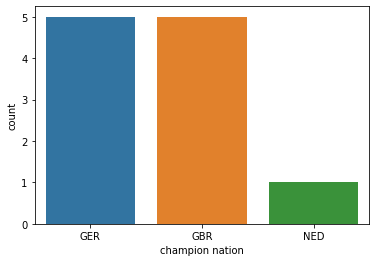

In [157]:
sns.countplot(x='champion nation',data=world_champion_nation)

In [167]:
world_champion = pd.DataFrame(drivers[drivers.groupby(["year"])["points"].transform("max")==drivers["points"]])
#indexfixing
world_champion.reset_index(level=0, inplace=True)
world_champion.drop("index", axis=1, inplace=True)
world_champion

,position,name,nationality,points,year
0,1,Sebastian Vettel,GER,256.0,2010
1,1,Sebastian Vettel,GER,392.0,2011
2,1,Sebastian Vettel,GER,281.0,2012
3,1,Sebastian Vettel,GER,397.0,2013
4,1,Lewis Hamilton,GBR,384.0,2014
5,1,Lewis Hamilton,GBR,381.0,2015
6,1,Nico Rosberg,GER,385.0,2016
7,1,Lewis Hamilton,GBR,363.0,2017
8,1,Lewis Hamilton,GBR,408.0,2018
9,1,Lewis Hamilton,GBR,413.0,2019


<AxesSubplot:xlabel='name', ylabel='count'>

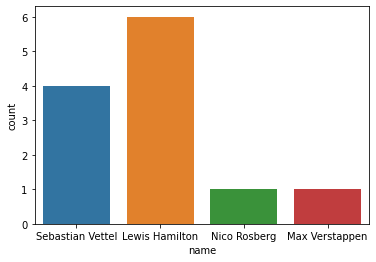

In [169]:
sns.countplot(x='name',data=world_champion)